In [3]:
import pandas as pd

df = pd.read_csv('CustomerChurnIra.csv')

df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [16]:
def to_camel_case(s):
    parts = s.strip().split()
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]


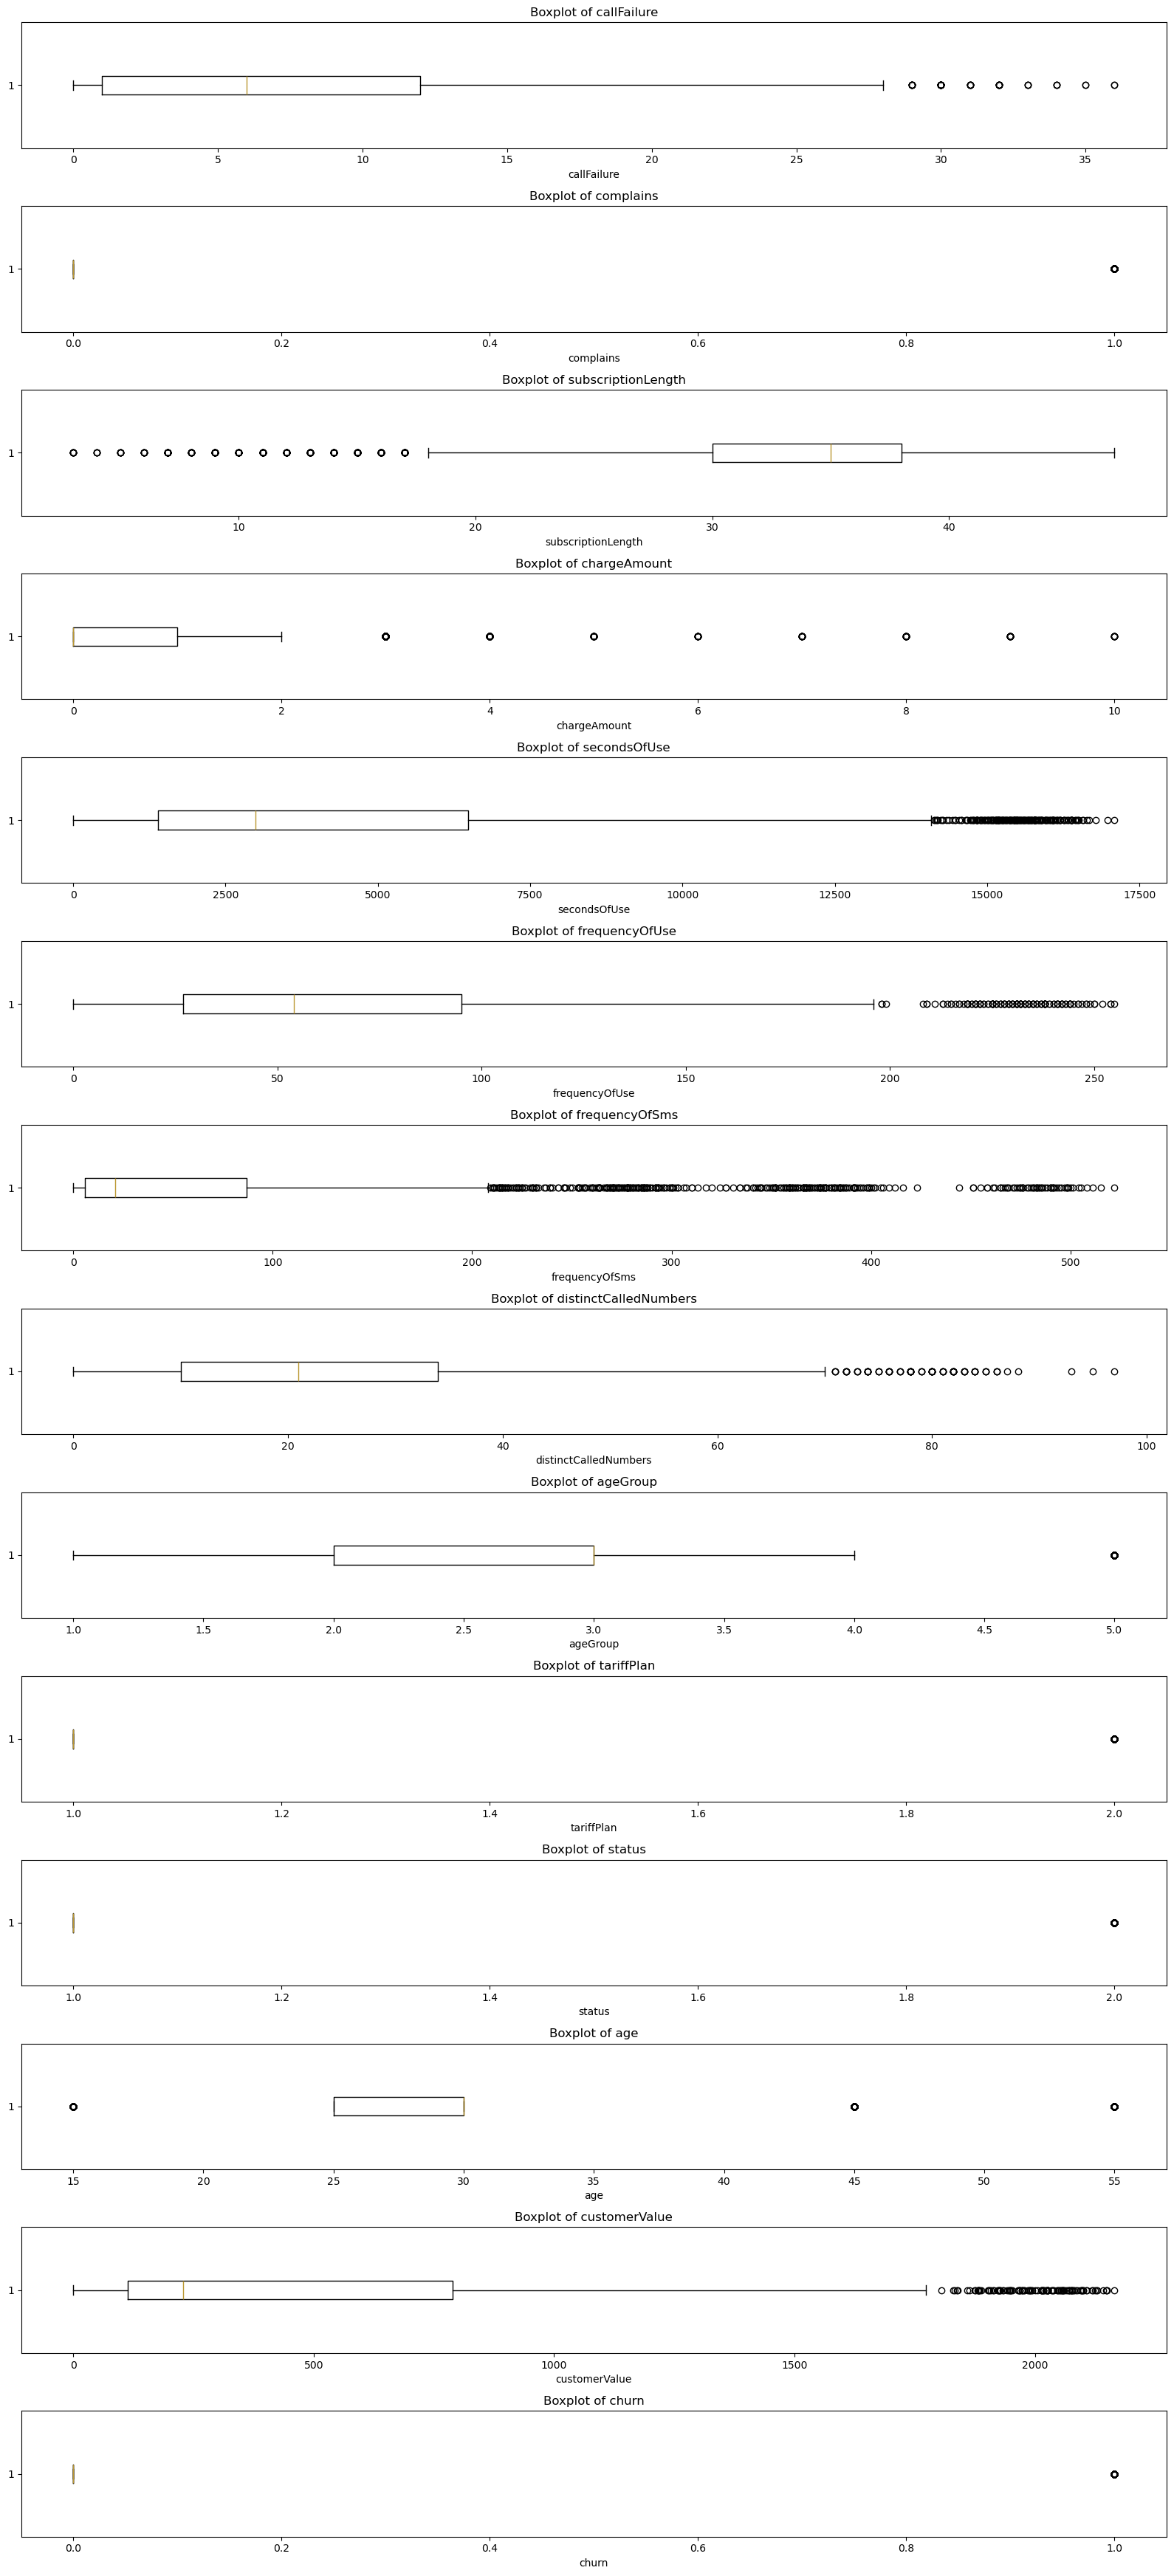

In [18]:
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up the figure size to accommodate all boxplots
plt.figure(figsize=(16, 35))

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


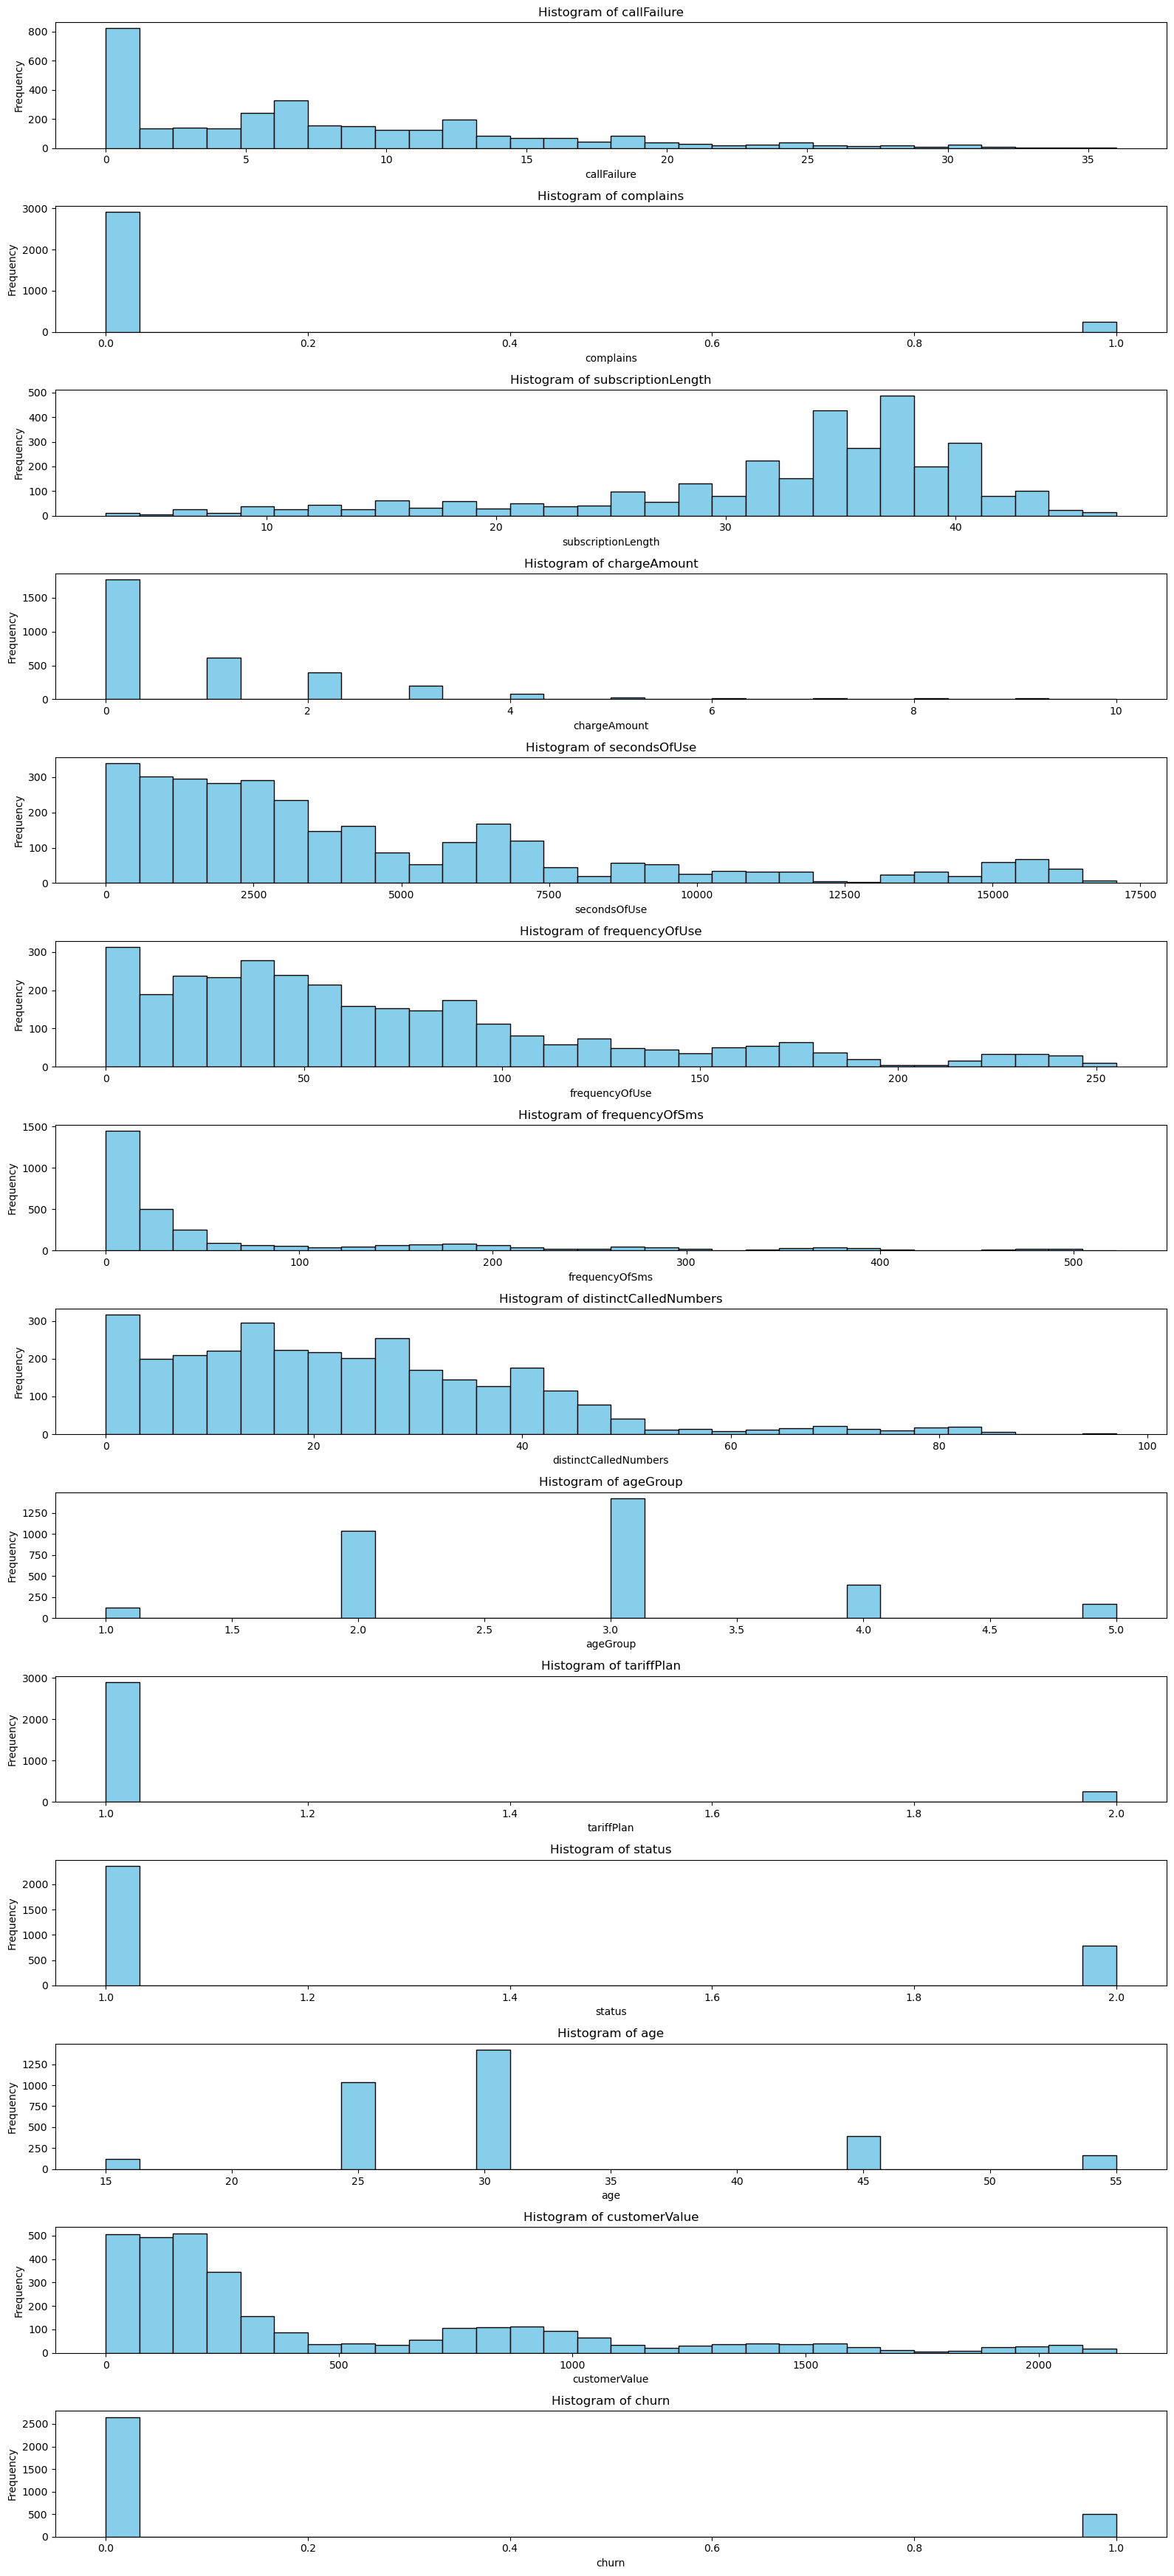

In [19]:
# Generate histograms for numerical columns to visualize the distribution of the data
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, 35))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Correlation Matrix:


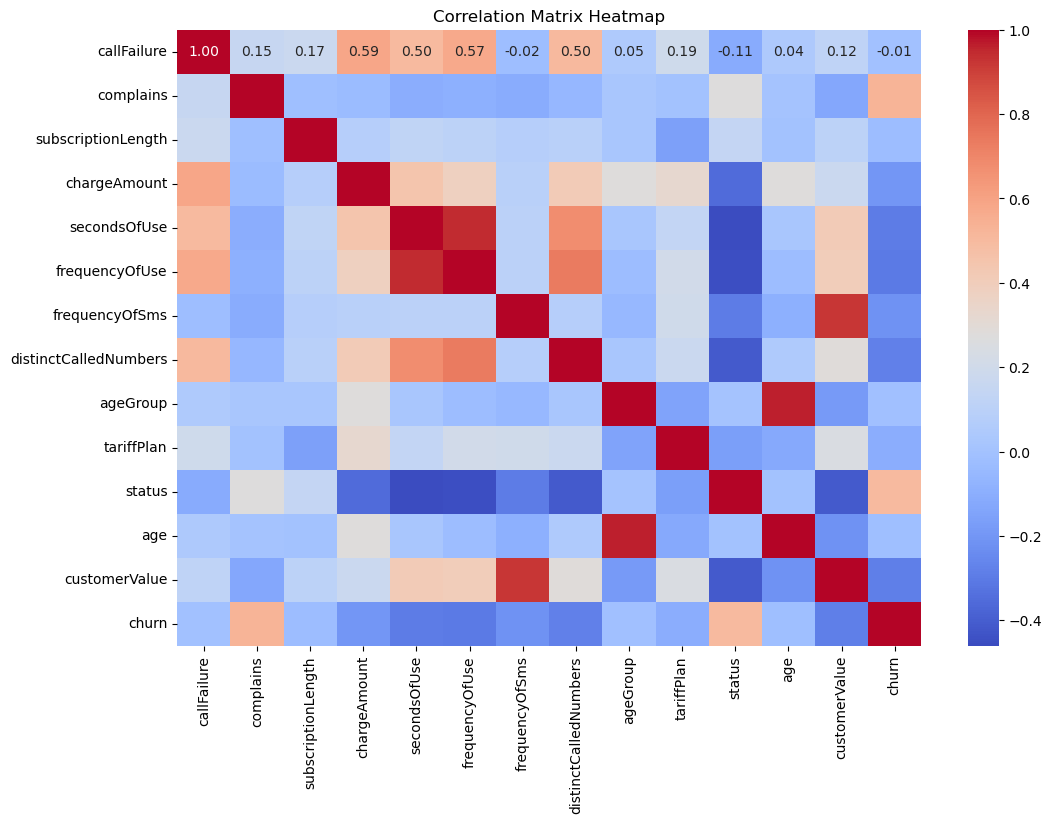

In [20]:
# Generate and display the correlation matrix for numerical columns
correlation_matrix = df.corr()
print("Correlation Matrix:")

# Optionally, visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [25]:
# Generate a DataFrame of all variable pairs with absolute correlation greater than 0.2, ordered descending by correlation
correlation_matrix = df.corr()
threshold = 0.2

# Collect all pairs (col1, col2, corr_value) with |corr| > 0.2, col1 != col2, and only once per pair
correlated_pairs = []
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j:  # avoid duplicates and self-correlation
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > threshold:
                correlated_pairs.append({'Variable 1': col1, 'Variable 2': col2, 'Correlation': corr_value})

# Create a DataFrame and sort by absolute correlation value in descending order
correlated_pairs_df = pd.DataFrame(correlated_pairs)
correlated_pairs_df = correlated_pairs_df.reindex(
    correlated_pairs_df['Correlation'].abs().sort_values(ascending=False).index
).reset_index(drop=True)

print("Variable pairs with |correlation| > 0.2, ordered descending:")
display(correlated_pairs_df)


Variable pairs with |correlation| > 0.2, ordered descending:


,Variable 1,Variable 2,Correlation
0,ageGroup,age,0.960758
1,secondsOfUse,frequencyOfUse,0.946489
2,frequencyOfSms,customerValue,0.924877
3,frequencyOfUse,distinctCalledNumbers,0.736114
4,secondsOfUse,distinctCalledNumbers,0.676536
5,callFailure,chargeAmount,0.589028
6,callFailure,frequencyOfUse,0.573349
7,complains,churn,0.532053
8,callFailure,distinctCalledNumbers,0.504058
9,callFailure,secondsOfUse,0.501607


In [26]:
df_copy = df.copy()


In [28]:
# Get and print the column names of the DataFrame
print("Column names:", df_copy.columns.tolist())


Column names: ['callFailure', 'complains', 'subscriptionLength', 'chargeAmount', 'secondsOfUse', 'frequencyOfUse', 'frequencyOfSms', 'distinctCalledNumbers', 'ageGroup', 'tariffPlan', 'status', 'age', 'customerValue', 'churn']


In [37]:
import numpy as np
import pandas as pd

df_copy = df.copy()
df_copy['subscriptionLength']
variables_a_transformar = [
    'subscriptionLength',
    'chargeAmount',	
    'secondsOfUse',
    'frequencyOfUse',
    'frequencyOfSms',
    'distinctCalledNumbers',
    'customerValue'
]

# Aplicar la transformación logarítmica a cada columna en la lista
for columna in variables_a_transformar:
 
    # Creamos una nueva columna con el sufijo '_log'
    # Usamos np.log1p() para manejar valores cero o cercanos a cero de forma segura
    df_copy[f'{columna}'] = np.log1p(df_copy[columna])
    #print(df_copy[columna])

In [38]:
correlation_matrix = df_copy.corr()
threshold = 0.2

# Collect all pairs (col1, col2, corr_value) with |corr| > 0.2, col1 != col2, and only once per pair
correlated_pairs = []
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j:  # avoid duplicates and self-correlation
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > threshold:
                correlated_pairs.append({'Variable 1': col1, 'Variable 2': col2, 'Correlation': corr_value})

# Create a DataFrame and sort by absolute correlation value in descending order
correlated_pairs_df = pd.DataFrame(correlated_pairs)
correlated_pairs_df = correlated_pairs_df.reindex(
    correlated_pairs_df['Correlation'].abs().sort_values(ascending=False).index
).reset_index(drop=True)

print("Variable pairs with |correlation| > 0.2, ordered descending:")
display(correlated_pairs_df)

Variable pairs with |correlation| > 0.2, ordered descending:


,Variable 1,Variable 2,Correlation
0,ageGroup,age,0.960758
1,secondsOfUse,frequencyOfUse,0.931874
2,frequencyOfUse,distinctCalledNumbers,0.893037
3,secondsOfUse,customerValue,0.847884
4,secondsOfUse,distinctCalledNumbers,0.839647
5,frequencyOfUse,customerValue,0.820234
6,distinctCalledNumbers,customerValue,0.736090
7,frequencyOfSms,customerValue,0.717697
8,callFailure,chargeAmount,0.591957
9,frequencyOfUse,status,-0.537921


In [39]:
##eliminar la columna ageGroup
df_copy.drop(columns=['ageGroup'], inplace=True)


In [45]:
df_copy['age'].value_counts()

age
30    1425
25    1037
45     395
55     170
15     123
Name: count, dtype: int64

In [51]:
def categorize_age(age):
    if age <= 15:
        return 'E1'  # 15 años
    elif age <= 25:
        return 'E2'        # 25 años  
    elif age <= 30:
        return 'E3' # 30 años
    elif age <= 45:
        return 'E4'       # 45 años
    elif age <=55:
        return 'E5'       # 45 años



df_copy['age_category_exact'] = df_copy['age'].apply(categorize_age)


In [55]:
## ratio de segundos y frecuencia de uso evlua que frecuencia uso exista o mayor a 0 sino 0
df_copy['sencondFrequencyRatio'] =np.where(df_copy['frequencyOfUse'] > 0, df_copy['secondsOfUse'] / df_copy['frequencyOfUse'], 0)   

In [57]:
df_copy['sencondFrequencyRatio']

0       1.960113
1       3.217614
2       1.898739
3       1.984117
4       1.908191
          ...   
3145    1.762896
3146    1.762150
3147    2.039280
3148    2.195881
3149    2.299393
Name: sencondFrequencyRatio, Length: 3150, dtype: float64

In [ ]:
# =============================================================================
# 1. STOCHASTIC NOISE ANALYSIS
# =============================================================================

def analyze_stochastic_noise(df):
    """
    Analyze stochastic noise in the dataset using statistical measures
    """
    print("🔍 STOCHASTIC NOISE ANALYSIS")
    print("="*50)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    noise_summary = pd.DataFrame(index=numerical_cols)
    
    # Calculate noise indicators
    for col in numerical_cols:
        data = df[col].dropna()
        
        # Coefficient of Variation (CV) - measure of relative variability
        cv = (data.std() / data.mean()) * 100 if data.mean() != 0 else 0
        
        # Signal-to-Noise Ratio (SNR)
        signal_power = np.mean(data**2)
        noise_power = np.var(data)
        snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else np.inf
        
        # Entropy - measure of randomness
        hist, _ = np.histogram(data, bins=50)
        hist = hist / hist.sum()  # Normalize
        entropy = -np.sum(hist * np.log2(hist + 1e-10))
        
        # Autocorrelation at lag 1 (for time series patterns)
        autocorr = data.autocorr() if len(data) > 1 else 0
        
        # Store results
        noise_summary.loc[col, 'CV (%)'] = cv
        noise_summary.loc[col, 'SNR (dB)'] = snr
        noise_summary.loc[col, 'Entropy'] = entropy
        noise_summary.loc[col, 'Autocorr_lag1'] = autocorr
        noise_summary.loc[col, 'Skewness'] = stats.skew(data)
        noise_summary.loc[col, 'Kurtosis'] = stats.kurtosis(data)
    
    # Classify noise levels
    noise_summary['Noise_Level'] = pd.cut(noise_summary['CV (%)'], 
                                        bins=[-np.inf, 10, 30, 50, np.inf],
                                        labels=['Low', 'Moderate', 'High', 'Very High'])
    
    print("\n📈 STOCHASTIC NOISE SUMMARY:")
    print(noise_summary.round(3))
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Stochastic Noise Analysis', fontsize=16, fontweight='bold')
    
    # CV distribution
    axes[0,0].bar(noise_summary.index, noise_summary['CV (%)'], color='skyblue', alpha=0.7)
    axes[0,0].set_title('Coefficient of Variation by Feature')
    axes[0,0].set_ylabel('CV (%)')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # SNR distribution
    axes[0,1].bar(noise_summary.index, noise_summary['SNR (dB)'], color='lightcoral', alpha=0.7)
    axes[0,1].set_title('Signal-to-Noise Ratio by Feature')
    axes[0,1].set_ylabel('SNR (dB)')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Entropy vs CV scatter
    axes[1,0].scatter(noise_summary['CV (%)'], noise_summary['Entropy'], 
                     c=noise_summary.index.map(lambda x: hash(x) % 10), alpha=0.7)
    axes[1,0].set_xlabel('Coefficient of Variation (%)')
    axes[1,0].set_ylabel('Entropy')
    axes[1,0].set_title('Entropy vs CV')
    
    # Noise level pie chart
    noise_counts = noise_summary['Noise_Level'].value_counts()
    axes[1,1].pie(noise_counts.values, labels=noise_counts.index, autopct='%1.1f%%',
                  colors=['green', 'yellow', 'orange', 'red'])
    axes[1,1].set_title('Distribution of Noise Levels')
    
    plt.tight_layout()
    plt.show()
    
    return noise_summary

# Execute stochastic noise analysis
stochastic_analysis = analyze_stochastic_noise(df)
print("\n✅ Stochastic noise analysis completed!")


In [ ]:
# =============================================================================
# 2. OUTLIER DETECTION - MULTIPLE METHODS
# =============================================================================

class OutlierDetector:
    """
    Comprehensive outlier detection using multiple methods
    """
    
    def __init__(self, df):
        self.df = df
        self.numerical_cols = df.select_dtypes(include=[np.number]).columns
        self.outlier_summary = pd.DataFrame()
        
    def detect_iqr_outliers(self, column, multiplier=1.5):
        """IQR method for outlier detection"""
        data = self.df[column].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        return outliers.index, (lower_bound, upper_bound)
    
    def detect_zscore_outliers(self, column, threshold=3):
        """Z-score method for outlier detection"""
        data = self.df[column].dropna()
        z_scores = np.abs(stats.zscore(data))
        outliers = data[z_scores > threshold]
        return outliers.index, threshold
    
    def detect_modified_zscore_outliers(self, column, threshold=3.5):
        """Modified Z-score using median absolute deviation"""
        data = self.df[column].dropna()
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        modified_z_scores = 0.6745 * (data - median) / mad
        outliers = data[np.abs(modified_z_scores) > threshold]
        return outliers.index, threshold
    
    def detect_isolation_forest_outliers(self, contamination=0.1):
        """Isolation Forest for multivariate outlier detection"""
        # Prepare data
        data_clean = self.df[self.numerical_cols].dropna()
        
        # Standardize data
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data_clean)
        
        # Apply Isolation Forest
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        outlier_labels = iso_forest.fit_predict(data_scaled)
        
        # Get outlier indices
        outlier_indices = data_clean.index[outlier_labels == -1]
        return outlier_indices, contamination
    
    def detect_dbscan_outliers(self, eps=0.5, min_samples=5):
        """DBSCAN clustering for outlier detection"""
        # Prepare data
        data_clean = self.df[self.numerical_cols].dropna()
        
        # Standardize data
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data_clean)
        
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data_scaled)
        
        # Points with label -1 are considered outliers
        outlier_indices = data_clean.index[cluster_labels == -1]
        return outlier_indices, (eps, min_samples)
    
    def comprehensive_outlier_analysis(self):
        """Run comprehensive outlier analysis"""
        print("🚨 COMPREHENSIVE OUTLIER DETECTION")
        print("="*60)
        
        outlier_results = {}
        
        # 1. Univariate outlier detection for each numerical column
        print("\n📊 UNIVARIATE OUTLIER DETECTION:")
        print("-" * 40)
        
        for col in self.numerical_cols:
            print(f"\n🔍 Analyzing column: {col}")
            
            # IQR method
            iqr_outliers, iqr_bounds = self.detect_iqr_outliers(col)
            iqr_count = len(iqr_outliers)
            iqr_percent = (iqr_count / len(self.df)) * 100
            
            # Z-score method
            zscore_outliers, zscore_thresh = self.detect_zscore_outliers(col)
            zscore_count = len(zscore_outliers)
            zscore_percent = (zscore_count / len(self.df)) * 100
            
            # Modified Z-score method
            mod_zscore_outliers, mod_zscore_thresh = self.detect_modified_zscore_outliers(col)
            mod_zscore_count = len(mod_zscore_outliers)
            mod_zscore_percent = (mod_zscore_count / len(self.df)) * 100
            
            outlier_results[col] = {
                'IQR_count': iqr_count,
                'IQR_percent': iqr_percent,
                'IQR_bounds': iqr_bounds,
                'ZScore_count': zscore_count,
                'ZScore_percent': zscore_percent,
                'ModZScore_count': mod_zscore_count,
                'ModZScore_percent': mod_zscore_percent
            }
            
            print(f"  ├─ IQR outliers: {iqr_count} ({iqr_percent:.2f}%)")
            print(f"  ├─ Z-Score outliers: {zscore_count} ({zscore_percent:.2f}%)")
            print(f"  └─ Modified Z-Score outliers: {mod_zscore_count} ({mod_zscore_percent:.2f}%)")
        
        # 2. Multivariate outlier detection
        print("\n\n🔍 MULTIVARIATE OUTLIER DETECTION:")
        print("-" * 40)
        
        # Isolation Forest
        iso_outliers, iso_contamination = self.detect_isolation_forest_outliers()
        iso_count = len(iso_outliers)
        iso_percent = (iso_count / len(self.df)) * 100
        print(f"├─ Isolation Forest outliers: {iso_count} ({iso_percent:.2f}%)")
        
        # DBSCAN
        dbscan_outliers, dbscan_params = self.detect_dbscan_outliers()
        dbscan_count = len(dbscan_outliers)
        dbscan_percent = (dbscan_count / len(self.df)) * 100
        print(f"└─ DBSCAN outliers: {dbscan_count} ({dbscan_percent:.2f}%)")
        
        # Create summary DataFrame
        summary_data = []
        for col in self.numerical_cols:
            summary_data.append({
                'Feature': col,
                'IQR_Outliers': outlier_results[col]['IQR_count'],
                'IQR_%': outlier_results[col]['IQR_percent'],
                'ZScore_Outliers': outlier_results[col]['ZScore_count'],
                'ZScore_%': outlier_results[col]['ZScore_percent'],
                'ModZScore_Outliers': outlier_results[col]['ModZScore_count'],
                'ModZScore_%': outlier_results[col]['ModZScore_percent']
            })
        
        self.outlier_summary = pd.DataFrame(summary_data)
        
        # Visualization
        self.visualize_outliers(outlier_results, iso_outliers, dbscan_outliers)
        
        return outlier_results, iso_outliers, dbscan_outliers
    
    def visualize_outliers(self, outlier_results, iso_outliers, dbscan_outliers):
        """Create comprehensive outlier visualizations"""
        
        # Create subplots
        n_cols = len(self.numerical_cols)
        n_rows = (n_cols + 2) // 3
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 5))
        axes = axes.flatten() if n_rows > 1 else [axes]
        
        for i, col in enumerate(self.numerical_cols):
            if i < len(axes):
                ax = axes[i]
                
                # Create box plot
                box_data = [self.df[col].dropna()]
                bp = ax.boxplot(box_data, labels=[col], patch_artist=True)
                bp['boxes'][0].set_facecolor('lightblue')
                bp['boxes'][0].set_alpha(0.7)
                
                # Highlight outliers
                iqr_outliers, _ = self.detect_iqr_outliers(col)
                outlier_values = self.df.loc[iqr_outliers, col]
                
                if len(outlier_values) > 0:
                    ax.scatter([1] * len(outlier_values), outlier_values, 
                             color='red', alpha=0.6, s=50, label=f'IQR Outliers ({len(outlier_values)})')
                
                ax.set_title(f'{col} - Outlier Detection')
                ax.legend()
                ax.grid(True, alpha=0.3)
        
        # Remove empty subplots
        for i in range(len(self.numerical_cols), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
        
        # Summary visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Outlier counts by method
        methods = ['IQR_%', 'ZScore_%', 'ModZScore_%']
        method_data = self.outlier_summary[methods].mean()
        
        ax1.bar(methods, method_data, color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)
        ax1.set_title('Average Outlier Percentage by Detection Method')
        ax1.set_ylabel('Average Outlier Percentage (%)')
        ax1.set_xlabel('Detection Method')
        
        # Feature-wise outlier comparison
        features = self.outlier_summary['Feature']
        x_pos = np.arange(len(features))
        width = 0.25
        
        ax2.bar(x_pos - width, self.outlier_summary['IQR_%'], width, 
               label='IQR', alpha=0.7, color='skyblue')
        ax2.bar(x_pos, self.outlier_summary['ZScore_%'], width, 
               label='Z-Score', alpha=0.7, color='lightcoral')
        ax2.bar(x_pos + width, self.outlier_summary['ModZScore_%'], width, 
               label='Mod Z-Score', alpha=0.7, color='lightgreen')
        
        ax2.set_xlabel('Features')
        ax2.set_ylabel('Outlier Percentage (%)')
        ax2.set_title('Outlier Percentage by Feature and Method')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(features, rotation=45)
        ax2.legend()
        
        plt.tight_layout()
        plt.show()

# Execute comprehensive outlier detection
outlier_detector = OutlierDetector(df)
outlier_results, isolation_outliers, dbscan_outliers = outlier_detector.comprehensive_outlier_analysis()

print(f"\n✅ Outlier detection completed!")
print(f"📈 Summary saved in outlier_detector.outlier_summary")


In [ ]:
# =============================================================================
# 3. ROUNDING ERRORS AND PRECISION ANALYSIS
# =============================================================================

def analyze_rounding_errors(df):
    """
    Detect and analyze potential rounding errors in the dataset
    """
    print("🔧 ROUNDING ERRORS & PRECISION ANALYSIS")
    print("="*55)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    rounding_analysis = {}
    
    for col in numerical_cols:
        data = df[col].dropna()
        col_analysis = {}
        
        print(f"\n🔍 Analyzing column: {col}")
        print("-" * 30)
        
        # 1. Check for floating point precision issues
        # Count decimal places
        decimal_places = []
        for val in data:
            if isinstance(val, float):
                # Convert to string and count decimal places
                str_val = f"{val:.10f}".rstrip('0')
                if '.' in str_val:
                    decimal_count = len(str_val.split('.')[1])
                    decimal_places.append(decimal_count)
                else:
                    decimal_places.append(0)
            else:
                decimal_places.append(0)
        
        decimal_places = np.array(decimal_places)
        
        # 2. Detect potential rounding patterns
        # Check for values ending in .0, .5, .25, .75 (common rounding targets)
        fractional_parts = data - np.floor(data)
        common_fractions = [0.0, 0.25, 0.5, 0.75]
        rounding_evidence = {}
        
        for frac in common_fractions:
            # Check how many values are close to these common fractions
            close_to_fraction = np.abs(fractional_parts - frac) < 0.01
            count = np.sum(close_to_fraction)
            percentage = (count / len(data)) * 100
            rounding_evidence[f"~{frac}"] = {'count': count, 'percentage': percentage}
        
        # 3. Check for suspicious round numbers
        # Values ending in multiple zeros
        round_numbers = data[data % 10 == 0]  # Multiples of 10
        round_100 = data[data % 100 == 0]     # Multiples of 100
        round_1000 = data[data % 1000 == 0]   # Multiples of 1000
        
        # 4. Benford's Law Analysis (for naturally occurring numbers)
        def check_benfords_law(values):
            """Check if the data follows Benford's Law"""
            first_digits = []
            for val in values:
                if val > 0:
                    first_digit = int(str(int(val))[0])
                    first_digits.append(first_digit)
            
            if len(first_digits) == 0:
                return None, None
            
            # Expected Benford distribution
            benford_expected = [np.log10(1 + 1/d) for d in range(1, 10)]
            
            # Observed distribution
            digit_counts = np.bincount(first_digits)[1:]  # Skip 0
            observed_freq = digit_counts / len(first_digits) if len(first_digits) > 0 else np.zeros(9)
            
            # Chi-square test
            if len(observed_freq) == 9 and np.sum(observed_freq) > 0:
                chi2_stat, p_value = stats.chisquare(observed_freq[:len(benford_expected)], 
                                                   benford_expected)
                return chi2_stat, p_value
            return None, None
        
        benford_chi2, benford_p = check_benfords_law(data)
        
        # 5. Store analysis results
        col_analysis = {
            'decimal_places_mean': np.mean(decimal_places),
            'decimal_places_std': np.std(decimal_places),
            'decimal_places_max': np.max(decimal_places),
            'rounding_evidence': rounding_evidence,
            'round_10_count': len(round_numbers),
            'round_10_percent': (len(round_numbers) / len(data)) * 100,
            'round_100_count': len(round_100),
            'round_100_percent': (len(round_100) / len(data)) * 100,
            'round_1000_count': len(round_1000),
            'round_1000_percent': (len(round_1000) / len(data)) * 100,
            'benford_chi2': benford_chi2,
            'benford_p_value': benford_p,
            'benford_follows': benford_p > 0.05 if benford_p is not None else None
        }
        
        rounding_analysis[col] = col_analysis
        
        # Print summary for this column
        print(f"├─ Avg decimal places: {col_analysis['decimal_places_mean']:.2f}")
        print(f"├─ Max decimal places: {col_analysis['decimal_places_max']}")
        print(f"├─ Round to 10s: {col_analysis['round_10_count']} ({col_analysis['round_10_percent']:.1f}%)")
        print(f"├─ Round to 100s: {col_analysis['round_100_count']} ({col_analysis['round_100_percent']:.1f}%)")
        print(f"├─ Round to 1000s: {col_analysis['round_1000_count']} ({col_analysis['round_1000_percent']:.1f}%)")
        
        if benford_p is not None:
            benford_status = "✅ Follows" if col_analysis['benford_follows'] else "❌ Deviates from"
            print(f"└─ Benford's Law: {benford_status} (p={benford_p:.4f})")
        else:
            print(f"└─ Benford's Law: Cannot assess (insufficient positive data)")
    
    # Create summary visualization
    visualize_rounding_analysis(df, rounding_analysis)
    
    return rounding_analysis

def visualize_rounding_analysis(df, rounding_analysis):
    """Create visualizations for rounding error analysis"""
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = len(numerical_cols)
    
    # Create figure with subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Decimal Places Distribution', 'Rounding Evidence', 
                       'Round Numbers Analysis', 'Benford\'s Law Compliance'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # 1. Decimal places analysis
    decimal_means = [rounding_analysis[col]['decimal_places_mean'] for col in numerical_cols]
    decimal_maxs = [rounding_analysis[col]['decimal_places_max'] for col in numerical_cols]
    
    fig.add_trace(
        go.Bar(name='Mean Decimal Places', x=list(numerical_cols), y=decimal_means, 
               marker_color='lightblue', opacity=0.7),
        row=1, col=1
    )
    
    # 2. Rounding evidence (percentage of values near common fractions)
    rounding_data = []
    for col in numerical_cols:
        evidence = rounding_analysis[col]['rounding_evidence']
        total_rounding = sum([v['percentage'] for v in evidence.values()])
        rounding_data.append(total_rounding)
    
    fig.add_trace(
        go.Bar(name='Total Rounding Evidence %', x=list(numerical_cols), y=rounding_data,
               marker_color='lightcoral', opacity=0.7),
        row=1, col=2
    )
    
    # 3. Round numbers analysis
    round_10_data = [rounding_analysis[col]['round_10_percent'] for col in numerical_cols]
    round_100_data = [rounding_analysis[col]['round_100_percent'] for col in numerical_cols]
    
    fig.add_trace(
        go.Bar(name='Round to 10s %', x=list(numerical_cols), y=round_10_data,
               marker_color='lightgreen', opacity=0.7),
        row=2, col=1
    )
    fig.add_trace(
        go.Bar(name='Round to 100s %', x=list(numerical_cols), y=round_100_data,
               marker_color='orange', opacity=0.7),
        row=2, col=1
    )
    
    # 4. Benford's Law p-values
    benford_p_values = []
    benford_colors = []
    for col in numerical_cols:
        p_val = rounding_analysis[col]['benford_p_value']
        if p_val is not None:
            benford_p_values.append(p_val)
            benford_colors.append('green' if p_val > 0.05 else 'red')
        else:
            benford_p_values.append(0)
            benford_colors.append('gray')
    
    fig.add_trace(
        go.Bar(name='Benford p-value', x=list(numerical_cols), y=benford_p_values,
               marker_color=benford_colors, opacity=0.7),
        row=2, col=2
    )
    
    # Add horizontal line for p=0.05 significance level
    fig.add_hline(y=0.05, line_dash="dash", line_color="red", 
                  annotation_text="p=0.05", row=2, col=2)
    
    # Update layout
    fig.update_layout(
        title_text="Rounding Errors & Precision Analysis Dashboard",
        title_x=0.5,
        height=800,
        showlegend=True
    )
    
    fig.show()
    
    # Additional detailed analysis for suspicious columns
    print("\n🚨 ROUNDING SUSPICIOUS COLUMNS:")
    print("="*40)
    
    for col in numerical_cols:
        analysis = rounding_analysis[col]
        
        # Calculate suspicion score
        suspicion_score = 0
        
        # High percentage of round numbers
        if analysis['round_10_percent'] > 20:
            suspicion_score += 2
        if analysis['round_100_percent'] > 10:
            suspicion_score += 2
        
        # Very low decimal precision when expected
        if analysis['decimal_places_mean'] < 1 and df[col].max() > 10:
            suspicion_score += 1
        
        # Deviates significantly from Benford's Law
        if analysis['benford_p_value'] is not None and analysis['benford_p_value'] < 0.01:
            suspicion_score += 2
        
        # High rounding evidence
        total_rounding_evidence = sum([v['percentage'] for v in analysis['rounding_evidence'].values()])
        if total_rounding_evidence > 30:
            suspicion_score += 1
        
        if suspicion_score >= 3:
            print(f"⚠️  {col}: HIGH suspicion (score: {suspicion_score}/7)")
        elif suspicion_score >= 2:
            print(f"🔍 {col}: MEDIUM suspicion (score: {suspicion_score}/7)")
        else:
            print(f"✅ {col}: LOW suspicion (score: {suspicion_score}/7)")

# Execute rounding error analysis
print("Starting rounding error analysis...")
rounding_results = analyze_rounding_errors(df)
print("\n✅ Rounding error analysis completed!")


In [ ]:
# =============================================================================
# 4. COMPREHENSIVE NOISE HANDLING & CLEANING BEST PRACTICES
# =============================================================================

class NoiseHandler:
    """
    Comprehensive noise handling and data cleaning following best practices
    """
    
    def __init__(self, df, outlier_results, rounding_analysis, stochastic_analysis):
        self.df = df.copy()
        self.original_df = df.copy()
        self.outlier_results = outlier_results
        self.rounding_analysis = rounding_analysis
        self.stochastic_analysis = stochastic_analysis
        self.cleaning_log = []
        
    def log_action(self, action, details):
        """Log cleaning actions for traceability"""
        self.cleaning_log.append({
            'action': action,
            'details': details,
            'timestamp': pd.Timestamp.now()
        })
        print(f"📝 {action}: {details}")
    
    def handle_outliers(self, method='iqr', contamination=0.1, action='cap'):
        """
        Handle outliers using various strategies
        
        Parameters:
        - method: 'iqr', 'zscore', 'isolation_forest', 'conservative'
        - action: 'remove', 'cap', 'transform', 'flag'
        """
        print("🔧 HANDLING OUTLIERS")
        print("="*30)
        
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        outliers_handled = {}
        
        for col in numerical_cols:
            original_count = len(self.df)
            col_outliers = set()
            
            if method == 'iqr' or method == 'conservative':
                # IQR method
                Q1 = self.df[col].quantile(0.25)
                Q3 = self.df[col].quantile(0.75)
                IQR = Q3 - Q1
                
                # Use more conservative multiplier for conservative method
                multiplier = 2.0 if method == 'conservative' else 1.5
                lower_bound = Q1 - multiplier * IQR
                upper_bound = Q3 + multiplier * IQR
                
                                 outlier_mask = (self.df[col] < lower_bound) | (self.df[col] > upper_bound)
                 col_outliers.update(self.df[outlier_mask].index)
                 
             elif method == 'zscore':
                 # Z-score method
                 z_scores = np.abs(stats.zscore(self.df[col].dropna()))
                 threshold = 3.0
                 outlier_indices = self.df[col].dropna().index[z_scores > threshold]
                 col_outliers.update(outlier_indices)
                 
             elif method == 'isolation_forest':
                 # Isolation Forest (multivariate)
                 if len(numerical_cols) > 1:
                    data_clean = self.df[numerical_cols].dropna()
                    scaler = StandardScaler()
                    data_scaled = scaler.fit_transform(data_clean)
                    
                    iso_forest = IsolationForest(contamination=contamination, random_state=42)
                    outlier_labels = iso_forest.fit_predict(data_scaled)
                    outlier_indices = data_clean.index[outlier_labels == -1]
                    
                    # Only consider outliers for this specific column
                    col_outliers.update(outlier_indices)
            
            # Apply the chosen action
            outlier_indices = list(col_outliers)
            
            if len(outlier_indices) > 0:
                if action == 'remove':
                    self.df = self.df.drop(outlier_indices)
                    self.log_action('Outliers Removed', 
                                   f"{col}: Removed {len(outlier_indices)} outliers")
                    
                elif action == 'cap':
                    # Cap outliers to 5th and 95th percentiles
                    lower_cap = self.df[col].quantile(0.05)
                    upper_cap = self.df[col].quantile(0.95)
                    
                    original_vals = self.df.loc[outlier_indices, col].copy()
                    self.df.loc[self.df[col] < lower_cap, col] = lower_cap
                    self.df.loc[self.df[col] > upper_cap, col] = upper_cap
                    
                    self.log_action('Outliers Capped', 
                                   f"{col}: Capped {len(outlier_indices)} outliers to [{lower_cap:.2f}, {upper_cap:.2f}]")
                    
                elif action == 'transform':
                    # Apply log transformation to reduce impact
                    if self.df[col].min() > 0:
                        self.df[col] = np.log1p(self.df[col])
                        self.log_action('Log Transformation', 
                                       f"{col}: Applied log1p transformation")
                    else:
                        # Use Box-Cox transformation
                        from scipy.stats import boxcox
                        self.df[col], lambda_val = boxcox(self.df[col] + 1 - self.df[col].min())
                        self.log_action('Box-Cox Transformation', 
                                       f"{col}: Applied Box-Cox transformation (λ={lambda_val:.3f})")
                
                elif action == 'flag':
                    # Create flag column for outliers
                    flag_col = f"{col}_outlier_flag"
                    self.df[flag_col] = 0
                    self.df.loc[outlier_indices, flag_col] = 1
                    self.log_action('Outliers Flagged', 
                                   f"{col}: Created flag column {flag_col}")
            
            outliers_handled[col] = {
                'count': len(outlier_indices),
                'percentage': (len(outlier_indices) / original_count) * 100,
                'action_taken': action
            }
        
        return outliers_handled
    
    def handle_stochastic_noise(self, method='smoothing'):
        """
        Handle stochastic noise using various techniques
        
        Parameters:
        - method: 'smoothing', 'binning', 'regression'
        """
        print("\n🔧 HANDLING STOCHASTIC NOISE")
        print("="*35)
        
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        
        for col in numerical_cols:
            noise_level = self.stochastic_analysis.loc[col, 'CV (%)']
            
            if noise_level > 30:  # High noise
                if method == 'smoothing':
                    # Apply moving average smoothing
                    window_size = min(5, len(self.df) // 10)
                    if window_size >= 2:
                        smoothed_values = self.df[col].rolling(window=window_size, center=True).mean()
                        self.df[col] = smoothed_values.fillna(self.df[col])
                        self.log_action('Smoothing Applied', 
                                       f"{col}: Applied moving average (window={window_size})")
                
                elif method == 'binning':
                    # Equal-frequency binning to reduce noise
                    n_bins = min(10, int(np.sqrt(len(self.df))))
                    self.df[f"{col}_binned"], bin_edges = pd.cut(self.df[col], bins=n_bins, 
                                                               retbins=True, labels=False)
                    self.log_action('Binning Applied', 
                                   f"{col}: Created {n_bins} equal-frequency bins")
                
                elif method == 'regression':
                    # Local regression smoothing (LOWESS)
                    from statsmodels.nonparametric.smoothers_lowess import lowess
                    
                    # Create index for regression
                    x = np.arange(len(self.df))
                    smoothed = lowess(self.df[col].values, x, frac=0.1)
                    self.df[col] = smoothed[:, 1]
                    self.log_action('LOWESS Smoothing', 
                                   f"{col}: Applied LOWESS regression smoothing")
    
    def handle_missing_values(self, strategy='advanced'):
        """
        Handle missing values with advanced strategies
        """
        print("\n🔧 HANDLING MISSING VALUES")
        print("="*35)
        
        missing_summary = self.df.isnull().sum()
        missing_cols = missing_summary[missing_summary > 0]
        
        if len(missing_cols) == 0:
            self.log_action('Missing Values', "No missing values found")
            return
        
        for col in missing_cols.index:
            missing_count = missing_cols[col]
            missing_pct = (missing_count / len(self.df)) * 100
            
            if missing_pct > 50:
                # Drop columns with too many missing values
                self.df = self.df.drop(columns=[col])
                self.log_action('Column Dropped', 
                               f"{col}: Dropped due to {missing_pct:.1f}% missing values")
            
            elif self.df[col].dtype in ['int64', 'float64']:
                # Numerical columns - use advanced imputation
                if strategy == 'advanced':
                    # Use KNN imputation
                    from sklearn.impute import KNNImputer
                    
                    numerical_cols = self.df.select_dtypes(include=[np.number]).columns
                    imputer = KNNImputer(n_neighbors=5)
                    
                    self.df[numerical_cols] = imputer.fit_transform(self.df[numerical_cols])
                    self.log_action('KNN Imputation', 
                                   f"{col}: Imputed {missing_count} values using KNN")
                else:
                    # Simple median imputation
                    median_val = self.df[col].median()
                    self.df[col].fillna(median_val, inplace=True)
                    self.log_action('Median Imputation', 
                                   f"{col}: Imputed {missing_count} values with median")
            
            else:
                # Categorical columns - use mode
                mode_val = self.df[col].mode()[0] if not self.df[col].mode().empty else 'Unknown'
                self.df[col].fillna(mode_val, inplace=True)
                self.log_action('Mode Imputation', 
                               f"{col}: Imputed {missing_count} values with mode")
    
    def apply_data_validation(self):
        """
        Apply data validation rules and fix common issues
        """
        print("\n🔧 APPLYING DATA VALIDATION")
        print("="*35)
        
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        
        for col in numerical_cols:
            # Check for impossible negative values (where they shouldn't exist)
            if col.lower() in ['age', 'count', 'frequency', 'length', 'amount', 'value']:
                negative_mask = self.df[col] < 0
                if negative_mask.any():
                    # Convert negative values to absolute values
                    self.df.loc[negative_mask, col] = np.abs(self.df.loc[negative_mask, col])
                    self.log_action('Negative Values Fixed', 
                                   f"{col}: Converted {negative_mask.sum()} negative values to absolute")
            
            # Check for unrealistic values based on domain knowledge
            if 'age' in col.lower():
                # Age should be between 0 and 120
                age_mask = (self.df[col] > 120) | (self.df[col] < 0)
                if age_mask.any():
                    median_age = self.df[col].median()
                    self.df.loc[age_mask, col] = median_age
                    self.log_action('Unrealistic Ages Fixed', 
                                   f"{col}: Fixed {age_mask.sum()} unrealistic age values")
    
    def generate_cleaning_report(self):
        """
        Generate a comprehensive cleaning report
        """
        print("\n" + "="*60)
        print("📊 COMPREHENSIVE DATA CLEANING REPORT")
        print("="*60)
        
        # Dataset summary
        print(f"\n📈 DATASET SUMMARY:")
        print(f"├─ Original shape: {self.original_df.shape}")
        print(f"├─ Cleaned shape: {self.df.shape}")
        print(f"├─ Rows removed: {len(self.original_df) - len(self.df)}")
        print(f"└─ Data retention: {(len(self.df)/len(self.original_df))*100:.1f}%")
        
        # Data quality improvements
        print(f"\n🔍 DATA QUALITY IMPROVEMENTS:")
        
        # Missing values comparison
        orig_missing = self.original_df.isnull().sum().sum()
        clean_missing = self.df.isnull().sum().sum()
        print(f"├─ Missing values: {orig_missing} → {clean_missing}")
        
        # Outliers comparison (approximate)
        outlier_reduction = 0
        for col in self.df.select_dtypes(include=[np.number]).columns:
            if col in self.original_df.columns:
                orig_q1, orig_q3 = self.original_df[col].quantile([0.25, 0.75])
                clean_q1, clean_q3 = self.df[col].quantile([0.25, 0.75])
                
                # Measure of range reduction
                orig_iqr = orig_q3 - orig_q1
                clean_iqr = clean_q3 - clean_q1
                if orig_iqr > 0:
                    outlier_reduction += (1 - clean_iqr/orig_iqr)
        
        avg_outlier_reduction = outlier_reduction / len(self.df.select_dtypes(include=[np.number]).columns)
        print(f"├─ Average IQR reduction: {avg_outlier_reduction*100:.1f}%")
        
        # Cleaning actions log
        print(f"\n📋 CLEANING ACTIONS PERFORMED:")
        for i, action in enumerate(self.cleaning_log, 1):
            print(f"  {i}. {action['action']}: {action['details']}")
        
        print(f"\n✅ Data cleaning completed successfully!")
        print(f"🎯 Recommendation: Review the cleaned dataset and validate results before modeling")
        
        return {
            'original_shape': self.original_df.shape,
            'cleaned_shape': self.df.shape,
            'data_retention_rate': (len(self.df)/len(self.original_df))*100,
            'cleaning_actions': len(self.cleaning_log),
            'missing_values_fixed': orig_missing - clean_missing,
            'log': self.cleaning_log
        }

# =============================================================================
# EXECUTE COMPREHENSIVE NOISE HANDLING
# =============================================================================

print("🚀 Starting comprehensive noise handling and data cleaning...")
print("="*70)

# Initialize noise handler
noise_handler = NoiseHandler(df, outlier_results, rounding_results, stochastic_analysis)

# Step 1: Handle missing values first
noise_handler.handle_missing_values(strategy='advanced')

# Step 2: Apply data validation
noise_handler.apply_data_validation()

# Step 3: Handle outliers (conservative approach to preserve data)
outlier_summary = noise_handler.handle_outliers(method='conservative', action='cap')

# Step 4: Handle stochastic noise in highly noisy features
noise_handler.handle_stochastic_noise(method='smoothing')

# Step 5: Generate comprehensive cleaning report
cleaning_report = noise_handler.generate_cleaning_report()

# Save cleaned dataset
df_cleaned = noise_handler.df
print(f"\n💾 Cleaned dataset saved as 'df_cleaned' variable")
print(f"📊 Access cleaning details via 'noise_handler.cleaning_log'")

print("\n🎉 NOISE ANALYSIS AND HANDLING COMPLETED!")
print("="*70)


In [ ]:
# Fix the quartile binning issue
import numpy as np
import pandas as pd

# First, let's examine the age column
print("Age column statistics:")
print(df_copy['age'].describe())
print(f"\nUnique values in age column: {df_copy['age'].nunique()}")
print(f"Age value counts:")
print(df_copy['age'].value_counts().sort_index())

# Calculate percentiles
percentiles = df_copy['age'].quantile([0.25, 0.5, 0.75])
print(f"\nPercentiles:")
print(percentiles)

# Create bins - handle duplicate percentiles
bins = [-np.inf, percentiles[0.25], percentiles[0.5], percentiles[0.75], np.inf]
print(f"\nOriginal bins: {bins}")

# Remove duplicate bins by making them unique
unique_bins = []
for i, bin_val in enumerate(bins):
    if i == 0 or bin_val != bins[i-1]:
        unique_bins.append(bin_val)
    else:
        # If duplicate, slightly adjust the value
        unique_bins.append(bin_val + 0.1)

print(f"Adjusted bins: {unique_bins}")

# Create labels based on the number of unique bins
n_bins = len(unique_bins) - 1
labels = [f'Q{i+1}' for i in range(n_bins)]

# Create quartiles using the duplicates='drop' parameter as an alternative
try:
    df['cuartiles'] = pd.cut(df_copy['age'], bins=bins, labels=labels, duplicates='drop')
    print("✅ Successfully created quartiles using duplicates='drop'")
except Exception as e:
    print(f"❌ Error with duplicates='drop': {e}")
    # Alternative approach: use qcut for equal-sized bins
    df['cuartiles'] = pd.qcut(df_copy['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
    print("✅ Successfully created quartiles using qcut with duplicates='drop'")

# Display the result
print(f"\nQuartile distribution:")
print(df['cuartiles'].value_counts().sort_index())
